In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv('air_connect/clean_dataset.csv')

In [3]:
flights.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# remove first column:
flights = flights[['airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price']]

In [5]:
flights.shape

(300153, 11)

In [6]:
flights.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [7]:
flights['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [8]:
flights['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [9]:
flights['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

<AxesSubplot:>

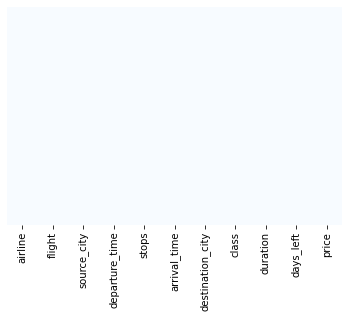

In [10]:
# check there are no null values - should be fully blank:
sns.heatmap(flights.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [11]:
flights['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

### **Numerical features:**

In [12]:
flights.describe().round(2)

,duration,days_left,price
count,300153.00,300153.00,300153.00
mean,12.22,26.00,20889.66
std,7.19,13.56,22697.77
min,0.83,1.00,1105.00
25%,6.83,15.00,4783.00
50%,11.25,26.00,7425.00
75%,16.17,38.00,42521.00
max,49.83,49.00,123071.00


<AxesSubplot:xlabel='duration', ylabel='Count'>

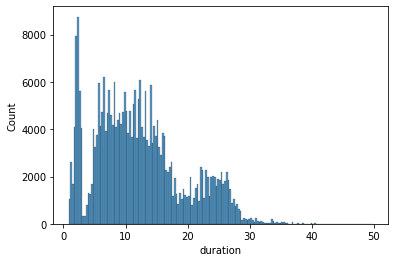

In [13]:
sns.histplot(data=flights, x="duration")

<AxesSubplot:xlabel='days_left', ylabel='Count'>

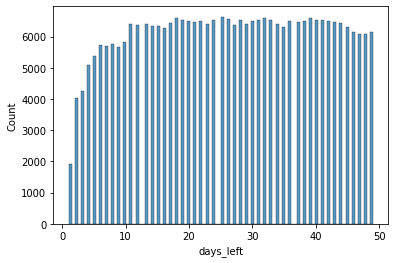

In [14]:
sns.histplot(data=flights, x="days_left", bins = 100)

<AxesSubplot:xlabel='price', ylabel='Count'>

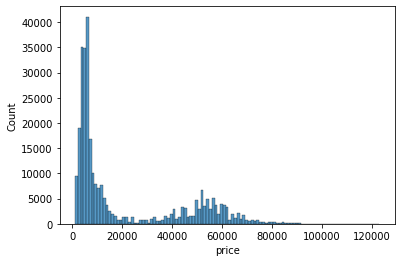

In [15]:
sns.histplot(data=flights, x="price")

In [16]:
flights.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

### **Bivariate plots**

**Price v Airline**

In [17]:
!pip install altair
import altair as alt

/Users/steve_gabriel/.zshenv:14: command not found: PS1
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [18]:
# for altair, maximum rows is 5,000 - therefore take a 0.016 random sample:
fl_sample = flights.sample(frac=0.0164)

In [19]:
fl_sample.shape

(4923, 11)

In [20]:
fl_sample['airline'].value_counts()

Vistara      2092
Air_India    1356
Indigo        675
GO_FIRST      371
AirAsia       278
SpiceJet      151
Name: airline, dtype: int64

In [21]:
alt.Chart(fl_sample).mark_boxplot(extent='min-max', size = 50).encode(
    x='airline:O',
    y='price:Q',
    color ='airline'
).properties(
    width=600,
    height=300
)

alt.Chart(...)

In [22]:
#duration v airline
alt.Chart(fl_sample).mark_boxplot(size = 50).encode(
    x='airline:O',
    y='duration:Q',
    color = 'airline'
).properties(
    width=600,
    height=300
)

alt.Chart(...)

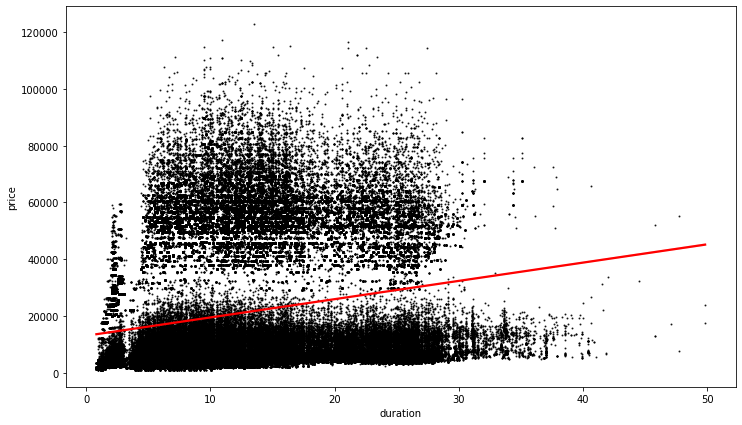

In [23]:
#duration v price
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
ax = sns.regplot(x = 'duration', y = 'price', data = flights, scatter_kws={"color": "black", 's':1}, line_kws={"color": "red"})
plt.show()

### **Convert categorical features\' values to numeric**

**For the variable *class* there are just two possible values, can use lambda function:**

In [24]:
flights['class'] = flights['class'].apply(lambda x: 0 if x == 'Economy' else 1)
flights.head(8)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,0,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,0,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,0,2.17,1,6060


#### *Airline*

In [25]:
airline_dum = pd.get_dummies(flights['airline'], drop_first = True)
airline_dum.head()

,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [26]:
flights = pd.concat([flights, airline_dum], axis = 1)
flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953,0,0,0,1,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953,0,0,0,1,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956,0,0,0,0,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,1


In [27]:
flights.drop(['airline'], inplace = True, axis = 1)

#### *Departure time* 

In [28]:
deptime_dum = pd.get_dummies(flights['departure_time'], drop_first = True)
flights = pd.concat([flights, deptime_dum], axis = 1)
flights.drop(['departure_time'], inplace = True, axis = 1)
flights.head()

,flight,source_city,stops,arrival_time,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Early_Morning,Evening,Late_Night,Morning,Night
0,SG-8709,Delhi,zero,Night,Mumbai,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0
1,SG-8157,Delhi,zero,Morning,Mumbai,0,2.33,1,5953,0,0,0,1,0,1,0,0,0,0
2,I5-764,Delhi,zero,Early_Morning,Mumbai,0,2.17,1,5956,0,0,0,0,0,1,0,0,0,0
3,UK-995,Delhi,zero,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,1,0,0,0,1,0
4,UK-963,Delhi,zero,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,1,0,0,0,1,0


*Rename these new column names to prevent duplication with arrival_time columns later*

In [29]:
flights.columns = ['flight', 'source_city', 'stops', 'arrival_time', 'destination_city',
       'class', 'duration', 'days_left', 'price', 'Air_India', 'GO_FIRST',
       'Indigo', 'SpiceJet', 'Vistara', 'dep_earlymorn', 'dep_evening',
       'dep_latenight', 'dep_morning', 'dep_night']

#### *Arrival time* 

In [30]:
arrtime_dum = pd.get_dummies(flights['arrival_time'], drop_first = True)
flights = pd.concat([flights, arrtime_dum], axis = 1)
flights.drop(['arrival_time'], inplace = True, axis = 1)
flights.head()

,flight,source_city,stops,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,...,dep_earlymorn,dep_evening,dep_latenight,dep_morning,dep_night,Early_Morning,Evening,Late_Night,Morning,Night
0,SG-8709,Delhi,zero,Mumbai,0,2.17,1,5953,0,0,...,0,1,0,0,0,0,0,0,0,1
1,SG-8157,Delhi,zero,Mumbai,0,2.33,1,5953,0,0,...,1,0,0,0,0,0,0,0,1,0
2,I5-764,Delhi,zero,Mumbai,0,2.17,1,5956,0,0,...,1,0,0,0,0,1,0,0,0,0
3,UK-995,Delhi,zero,Mumbai,0,2.25,1,5955,0,0,...,0,0,0,1,0,0,0,0,0,0
4,UK-963,Delhi,zero,Mumbai,0,2.33,1,5955,0,0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
# rename new columns with arr prefix
flights.columns = ['flight', 'source_city', 'stops', 'destination_city', 'class','duration', 'days_left', 'price', 'Air_India', 'GO_FIRST', 'Indigo','SpiceJet', 'Vistara', 'dep_earlymorn', 'dep_evening', 'dep_latenight',
'dep_morning', 'dep_night', 'arr_earlymorn', 'arr_evening', 'arr_latenight',
'arr_morning', 'arr_night']

#### *Stops* 

In [32]:
stops_dum = pd.get_dummies(flights['stops'], drop_first = True)
flights = pd.concat([flights, stops_dum], axis = 1)
flights.drop(['stops'], inplace = True, axis = 1)
flights.head()

,flight,source_city,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,...,dep_latenight,dep_morning,dep_night,arr_earlymorn,arr_evening,arr_latenight,arr_morning,arr_night,two_or_more,zero
0,SG-8709,Delhi,Mumbai,0,2.17,1,5953,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,SG-8157,Delhi,Mumbai,0,2.33,1,5953,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,I5-764,Delhi,Mumbai,0,2.17,1,5956,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,UK-995,Delhi,Mumbai,0,2.25,1,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,UK-963,Delhi,Mumbai,0,2.33,1,5955,0,0,0,...,0,1,0,0,0,0,1,0,0,1


#### *Source City* 

In [33]:
source_dum = pd.get_dummies(flights['source_city'], drop_first = True)
flights = pd.concat([flights, source_dum], axis = 1)
flights.drop(['source_city'], inplace = True, axis = 1)
flights.head()

,flight,destination_city,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,...,arr_latenight,arr_morning,arr_night,two_or_more,zero,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,SG-8709,Mumbai,0,2.17,1,5953,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
1,SG-8157,Mumbai,0,2.33,1,5953,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
2,I5-764,Mumbai,0,2.17,1,5956,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,UK-995,Mumbai,0,2.25,1,5955,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,UK-963,Mumbai,0,2.33,1,5955,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


#### *Destination City* 

*Rename these arrival column names to prevent duplication*

In [34]:
flights.columns = ['flight', 'destination_city', 'class', 'duration', 'days_left', 'price',
       'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara',
       'dep_earlymorn', 'dep_evening', 'dep_latenight', 'dep_morning',
       'dep_night', 'arr_earlymorn', 'arr_evening', 'arr_latenight',
       'arr_morning', 'arr_night', 'two_or_more', 'zero', 'source_chennai', 'source_delhi',
       'source_hyderabad', 'source_kolkata', 'source_mumbai']

In [35]:
dest_dum = pd.get_dummies(flights['destination_city'], drop_first = True)
flights = pd.concat([flights, dest_dum], axis = 1)
flights.drop(['destination_city'], inplace = True, axis = 1)
flights.head()

,flight,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,...,source_chennai,source_delhi,source_hyderabad,source_kolkata,source_mumbai,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,SG-8709,0,2.17,1,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,SG-8157,0,2.33,1,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,I5-764,0,2.17,1,5956,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,UK-995,0,2.25,1,5955,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,UK-963,0,2.33,1,5955,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [36]:
flights.columns = ['flight', 'class', 'duration', 'days_left', 'price', 'Air_India',
       'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara', 'dep_earlymorn',
       'dep_evening', 'dep_latenight', 'dep_morning', 'dep_night',
       'arr_earlymorn', 'arr_evening', 'arr_latenight', 'arr_morning',
       'arr_night', 'two_or_more', 'zero', 'source_chennai', 'source_delhi',
       'source_hyderabad', 'source_kolkata', 'source_mumbai', 'dest_chennai',
       'dest_delhi', 'dest_hyderabad', 'dest_kolkata', 'dest_mumbai']

In [37]:
flights.head()

,flight,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,...,source_chennai,source_delhi,source_hyderabad,source_kolkata,source_mumbai,dest_chennai,dest_delhi,dest_hyderabad,dest_kolkata,dest_mumbai
0,SG-8709,0,2.17,1,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,SG-8157,0,2.33,1,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,I5-764,0,2.17,1,5956,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,UK-995,0,2.25,1,5955,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,UK-963,0,2.33,1,5955,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [38]:
# For the initial model, flight will be dropped:
flights.drop(['flight'], inplace = True, axis = 1)

In [39]:
flights.dtypes

class                 int64
duration            float64
days_left             int64
price                 int64
Air_India             uint8
GO_FIRST              uint8
Indigo                uint8
SpiceJet              uint8
Vistara               uint8
dep_earlymorn         uint8
dep_evening           uint8
dep_latenight         uint8
dep_morning           uint8
dep_night             uint8
arr_earlymorn         uint8
arr_evening           uint8
arr_latenight         uint8
arr_morning           uint8
arr_night             uint8
two_or_more           uint8
zero                  uint8
source_chennai        uint8
source_delhi          uint8
source_hyderabad      uint8
source_kolkata        uint8
source_mumbai         uint8
dest_chennai          uint8
dest_delhi            uint8
dest_hyderabad        uint8
dest_kolkata          uint8
dest_mumbai           uint8
dtype: object

In [40]:
flights_section_1= flights[['class','duration']]
flights_section_2= flights.drop(['class','duration'], axis = 1)

In [41]:
flights_section_2 = flights_section_2.astype(np.int64)

In [42]:
flights = pd.concat([flights_section_1, flights_section_2], axis = 1)

In [43]:
flights.columns

Index(['class', 'duration', 'days_left', 'price', 'Air_India', 'GO_FIRST',
       'Indigo', 'SpiceJet', 'Vistara', 'dep_earlymorn', 'dep_evening',
       'dep_latenight', 'dep_morning', 'dep_night', 'arr_earlymorn',
       'arr_evening', 'arr_latenight', 'arr_morning', 'arr_night',
       'two_or_more', 'zero', 'source_chennai', 'source_delhi',
       'source_hyderabad', 'source_kolkata', 'source_mumbai', 'dest_chennai',
       'dest_delhi', 'dest_hyderabad', 'dest_kolkata', 'dest_mumbai'],
      dtype='object')

# **Train** 

In [44]:
X = flights.drop(columns =['price'])
y = flights['price']

In [45]:
X.head()

,class,duration,days_left,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,dep_earlymorn,dep_evening,...,source_chennai,source_delhi,source_hyderabad,source_kolkata,source_mumbai,dest_chennai,dest_delhi,dest_hyderabad,dest_kolkata,dest_mumbai
0,0,2.17,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,2.33,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0,2.17,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,2.25,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,2.33,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [46]:
y.head(8)

0    5953
1    5953
2    5956
3    5955
4    5955
5    5955
6    6060
7    6060
Name: price, dtype: int64

In [47]:
X.shape

(300153, 30)

In [48]:
y.shape

(300153,)

In [49]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [50]:
y = y.reshape(-1,1)

In [51]:
y

array([[ 5953.],
       [ 5953.],
       [ 5956.],
       ...,
       [79099.],
       [81585.],
       [81585.]], dtype=float32)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=37)

In [53]:
#scaling the data before running the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [54]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [55]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
round(regresssion_model_sklearn_accuracy,4)

0.9121

In [56]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [57]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)

In [59]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nR2 =', round(r2,4)) 

RMSE = 6727.138 
MSE = 45254384.0 
R2 = 0.9121


In [60]:
predict_df = pd.DataFrame(y_predict_orig)
test_df = pd.DataFrame(y_test_orig)

In [61]:
compared = pd.concat([test_df, predict_df], axis = 1)

In [62]:
compared.head(7)

,0,0
0,1788.000732,-2428.532471
1,3393.000732,6790.388672
2,4496.000000,7349.903320
3,31982.000000,50771.546875
4,6437.000000,13422.917969
5,3999.000732,119.041809
6,5134.000000,5921.226562


In [63]:
compared.columns = ['test','predict']

<AxesSubplot:xlabel='test', ylabel='predict'>

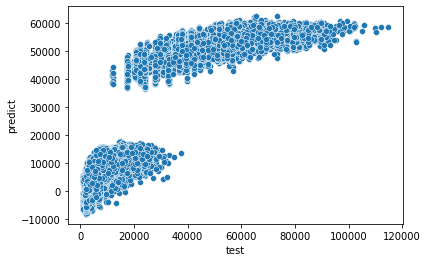

In [64]:
sns.scatterplot(data= compared, x="test", y="predict")

## **XGBoost**

In [65]:
!pip install xgboost
import xgboost as xgb

/Users/steve_gabriel/.zshenv:14: command not found: PS1
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [66]:
model = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 8, n_estimators = 50)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
result = model.score(X_test, y_test)
print("Accuracy  {}".format(result))

Accuracy  0.9721370756578489


In [68]:
y_predict = model.predict(X_test)

In [69]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [70]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)

In [71]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nR2 =', round(r2,4)) 

RMSE = 3788.376 
MSE = 14351792.0 
R2 = 0.9721


In [72]:
predict_df = pd.DataFrame(y_predict_orig)
test_df = pd.DataFrame(y_test_orig)

In [73]:
compared = pd.concat([test_df, predict_df], axis = 1)

In [74]:
compared.head(7)

,0,0
0,1788.000732,1914.061279
1,3393.000732,4214.868164
2,4496.000000,5615.792969
3,31982.000000,32720.732422
4,6437.000000,7556.051758
5,3999.000732,3948.246826
6,5134.000000,6090.638672


In [75]:
compared.columns = ['test','predict']

<AxesSubplot:xlabel='test', ylabel='predict'>

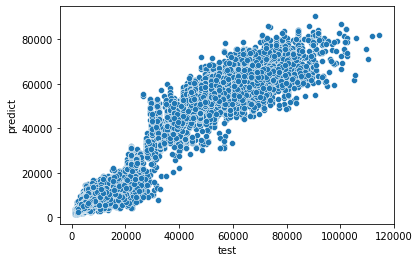

In [76]:
sns.scatterplot(data= compared, x="test", y="predict")